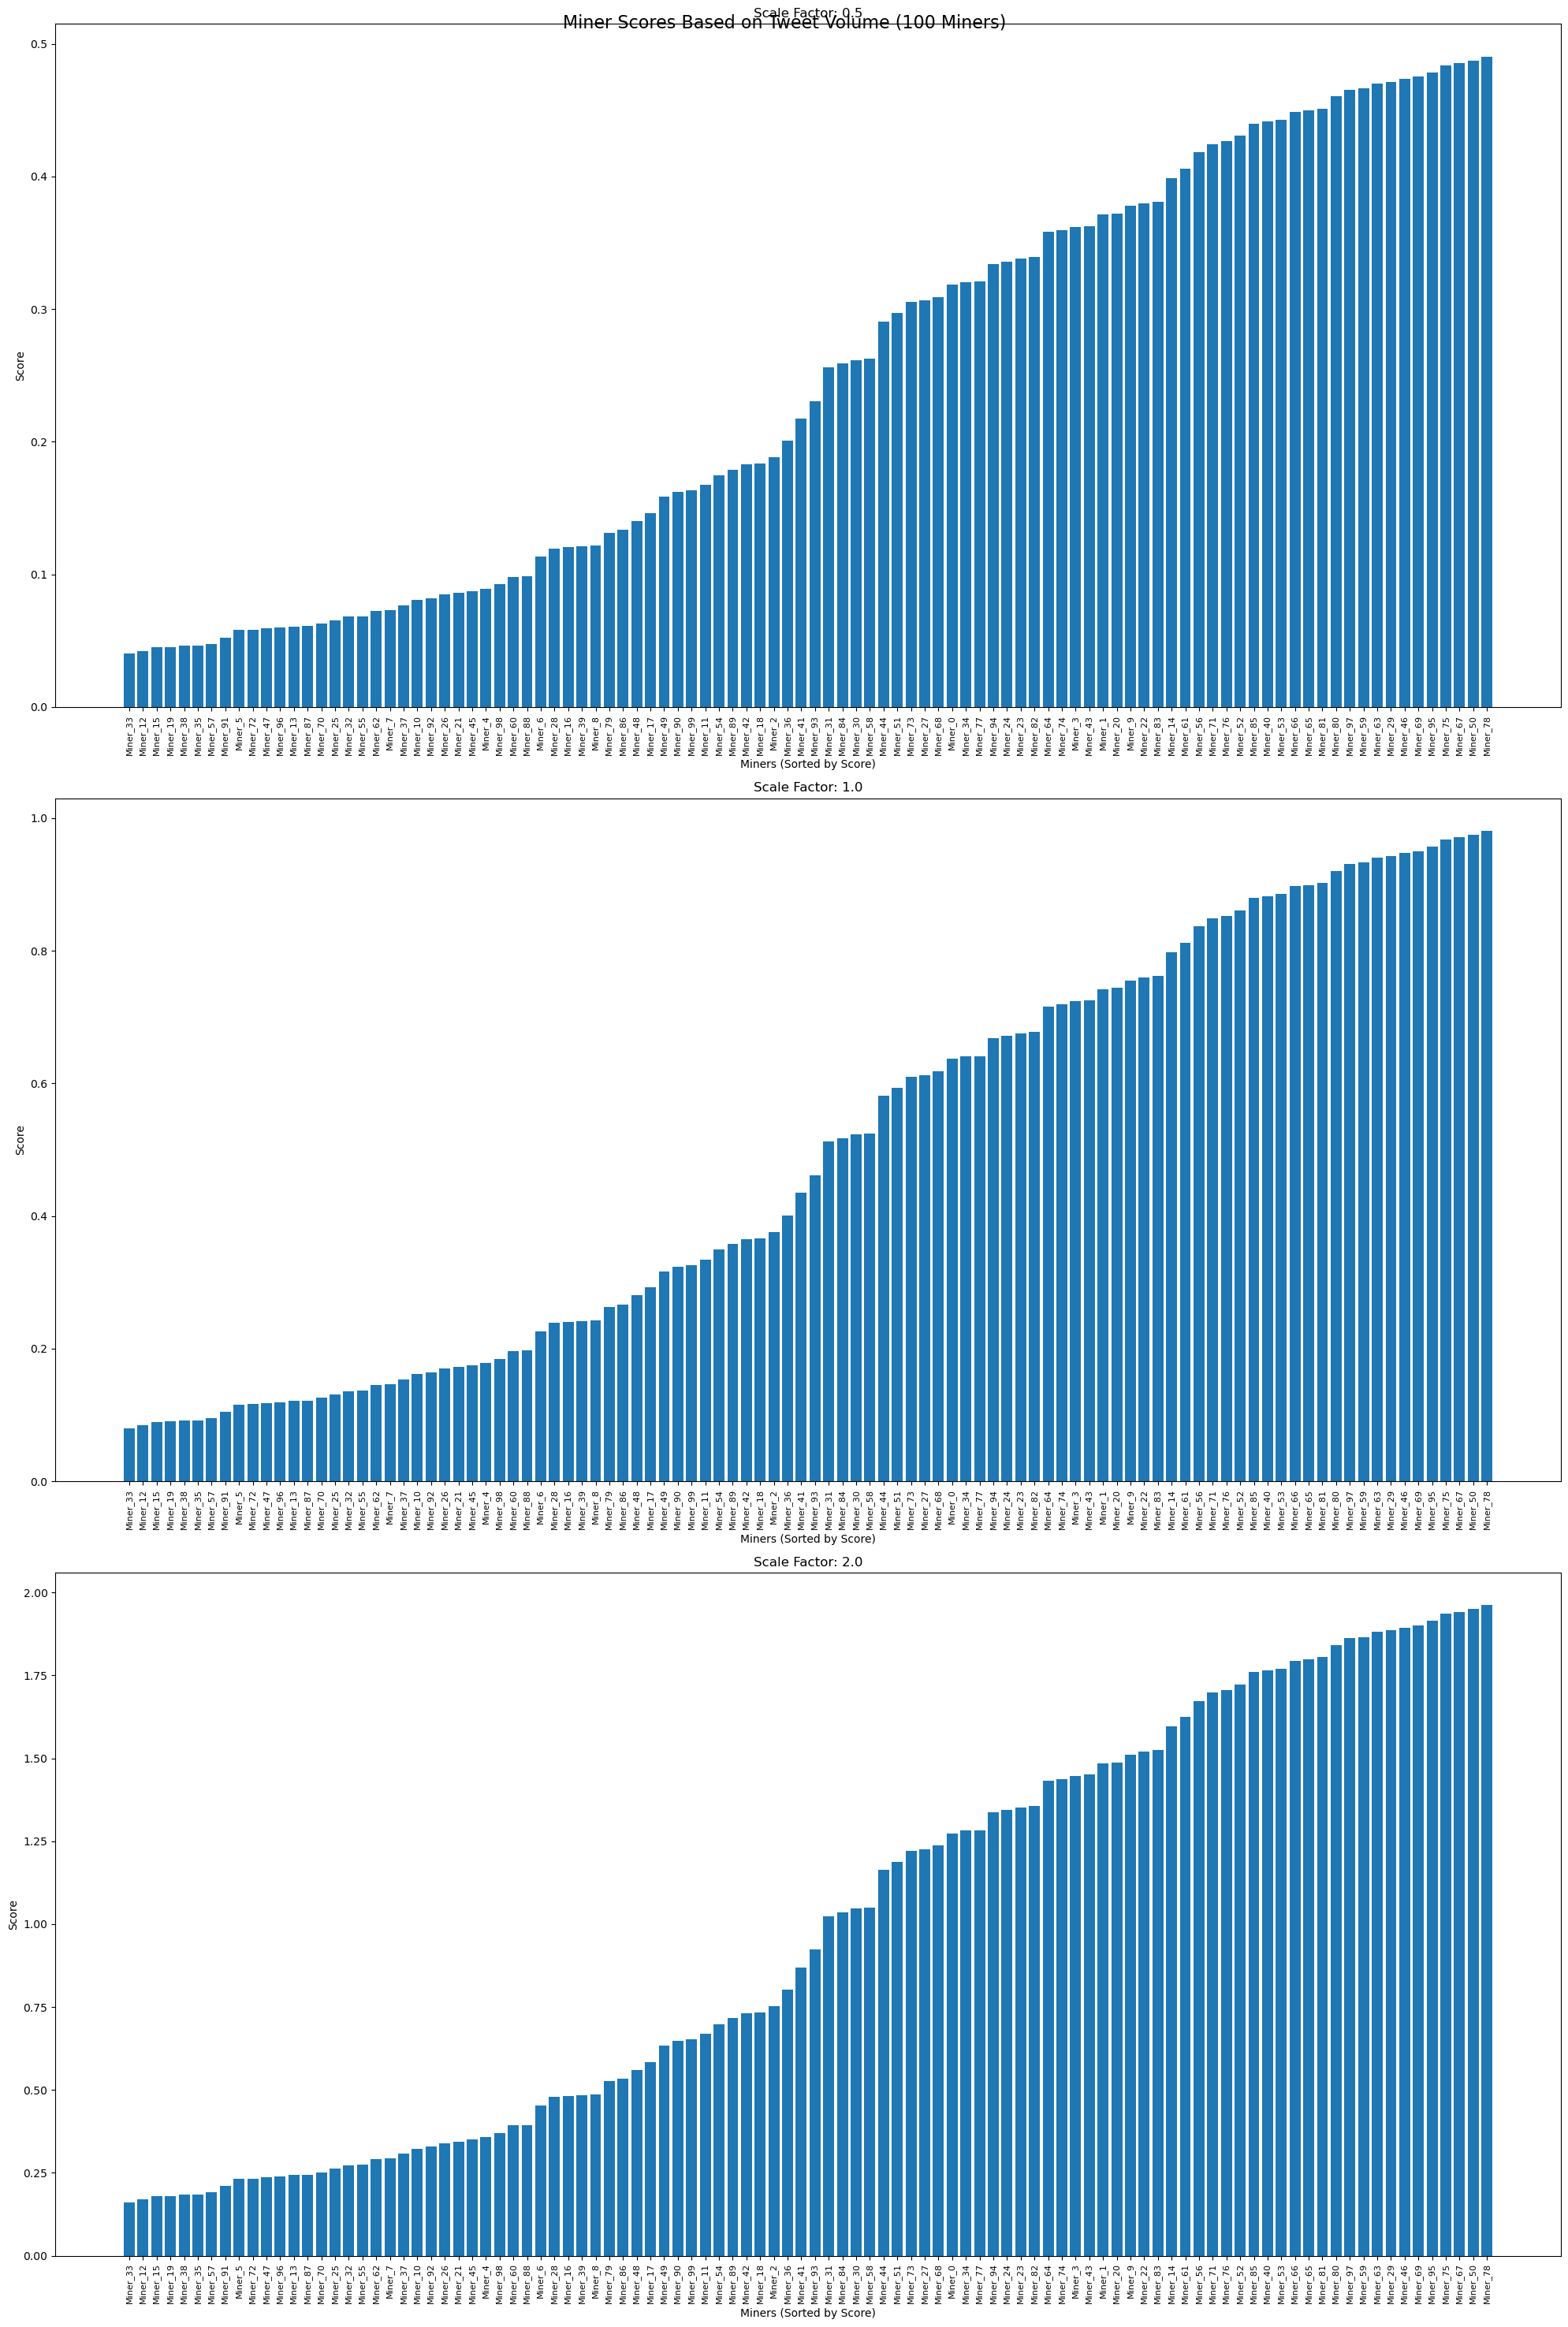

          Total Volume  Score (scale=0.5)  Score (scale=1.0)  \
Miner_78   1866.975173           0.490433           0.980867   
Miner_50   1815.795225           0.487344           0.974688   
Miner_67   1789.947978           0.485490           0.970981   
Miner_75   1768.835562           0.483814           0.967627   
Miner_95   1712.485965           0.478543           0.957086   
...                ...                ...                ...   
Miner_38    383.679812           0.046014           0.092028   
Miner_19    378.893334           0.045115           0.090229   
Miner_15    378.002457           0.044949           0.089897   
Miner_12    363.802978           0.042365           0.084730   
Miner_33    351.456485           0.040211           0.080421   

          Score (scale=2.0)  
Miner_78           1.961733  
Miner_50           1.949377  
Miner_67           1.941962  
Miner_75           1.935254  
Miner_95           1.914173  
...                     ...  
Miner_38           0.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Real-world data
real_data = [
    {"tempo": 7555, "miners": {"3": 103, "8": 100, "11": 97}},
    {"tempo": 7556, "miners": {"3": 124, "8": 117, "11": 130}},
    {"tempo": 7557, "miners": {"3": 89, "8": 104, "11": 101}},
    {"tempo": 7558, "miners": {"3": 58, "8": 89, "11": 80}},
    {"tempo": 7559, "miners": {"3": 81, "8": 76, "11": 69}},
    {"tempo": 7560, "miners": {"3": 36, "8": 43, "11": 72}},
    {"tempo": 7561, "miners": {"3": 43, "8": 49, "11": 58}},
    {"tempo": 7562, "miners": {"3": 96, "8": 88, "11": 86}},
    {"tempo": 7563, "miners": {"3": 93, "8": 34, "11": 80}},
    {"tempo": 7564, "miners": {"3": 69, "8": 67, "11": 64}},
    {"tempo": 7565, "miners": {"3": 92, "8": 75, "11": 64}},
    {"tempo": 7566, "miners": {"3": 79, "8": 68, "11": 85}},
    {"tempo": 7567, "miners": {"3": 11, "8": 14, "11": 15}}
]

# Extract statistics from real data
real_df = pd.DataFrame([entry['miners'] for entry in real_data])
mean_volumes = real_df.mean()
std_volumes = real_df.std()

# Simulation parameters
num_miners = 100
num_periods = len(real_data)
scale_factors = [0.5, 1.0, 2.0]

# Generate synthetic data based on real-world statistics
def generate_miner_data():
    base_volume = np.random.choice(mean_volumes)
    trend = np.random.uniform(-10, 10)
    noise = np.random.normal(0, np.mean(std_volumes), num_periods)
    volumes = base_volume + trend * np.arange(num_periods) + noise
    return np.maximum(volumes, 0)  # Ensure non-negative volumes

miner_data = {f"Miner_{i}": generate_miner_data() for i in range(num_miners)}
df = pd.DataFrame(miner_data)
total_volumes = df.sum()

# Scoring function
def kurtosis_based_score(volume, mean, std_dev, scale_factor=1.0):
    return 0 if std_dev == 0 else stats.norm.cdf((volume - mean) / std_dev) * scale_factor

# Calculate scores for different scale factors
mean_volume = total_volumes.mean()
std_dev_volume = total_volumes.std()
scores = {
    f"Score (scale={scale})": total_volumes.apply(
        lambda x: kurtosis_based_score(x, mean_volume, std_dev_volume, scale)
    )
    for scale in scale_factors
}

# Plotting
fig, axes = plt.subplots(len(scale_factors), 1, figsize=(20, 10 * len(scale_factors)))
fig.suptitle("Miner Scores Based on Tweet Volume (100 Miners)", fontsize=16)

for i, (scale, score) in enumerate(scores.items()):
    sorted_scores = score.sort_values(ascending=False)
    axes[i].bar(range(len(sorted_scores))[::-1], sorted_scores.values)
    axes[i].set_title(f"Scale Factor: {scale_factors[i]}")
    axes[i].set_xlabel("Miners (Sorted by Score)")
    axes[i].set_ylabel("Score")
    axes[i].set_xticks(range(len(sorted_scores))[::-1])
    axes[i].set_xticklabels(sorted_scores.index, rotation=90, ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Display data
result_df = pd.DataFrame({"Total Volume": total_volumes, **scores}).sort_values("Score (scale=1.0)", ascending=False)
print(result_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>